In [ ]:
!python3 -m pip install paddlepaddle-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.5/542.5 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.0 MB/s eta 0:00:00


In [ ]:
!pip install "paddleocr>=2.0.1"

In [ ]:
# Initialisation de PaddleOCR :
from paddleocr import PaddleOCR, draw_ocr
ocr = PaddleOCR(use_angle_cls=True, lang='en')

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:00<00:00, 4.93MiB/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:06<00:00, 1.65MiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:00<00:00, 2.91MiB/s]

[2023/12/03 15:42:35] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/

[2023/12/03 15:45:35] ppocr DEBUG: dt_boxes num : 31, elapsed : 0.13428902626037598
[2023/12/03 15:45:35] ppocr DEBUG: cls num  : 31, elapsed : 0.1443026065826416
[2023/12/03 15:45:35] ppocr DEBUG: rec_res num  : 31, elapsed : 0.2929208278656006


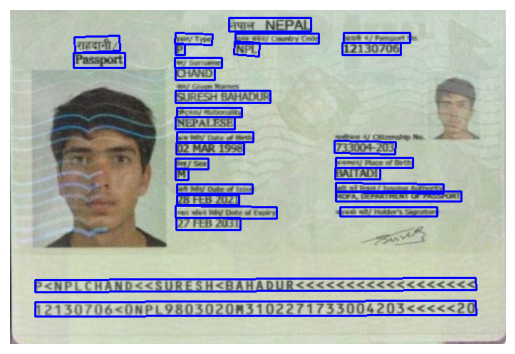

In [ ]:
# Import des bibliothèques :
import cv2
import re
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image

# Chargement d'une image :
image_path = '/content/WhatsApp_Image_12.jpg'
img = cv2.imread(image_path)

# Détection du texte :
result = ocr.ocr(img, cls=True)[0]  # On suppose qu'il y a une seule image dans le lot.

# Extraction des boîtes englobantes pour l'image courante :
boxes = [line[0] for line in result]

# Dessin des boîtes englobantes sur l'image :
image_with_boxes = draw_ocr(img, boxes, font_path='path/to/a/truetype/font/file.ttf')

# Affichage du résultat :
plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
# Effectue la reconnaissance optique de caractères (OCR) sur l'image et affiche le résultat par ligne :
result = ocr.ocr(image_path, cls=True)
for line in result:
    print(line)

[2023/12/03 15:45:36] ppocr DEBUG: dt_boxes num : 31, elapsed : 0.2106471061706543
[2023/12/03 15:45:36] ppocr DEBUG: cls num  : 31, elapsed : 0.10731768608093262
[2023/12/03 15:45:36] ppocr DEBUG: rec_res num  : 31, elapsed : 0.24435186386108398
[[[[307.0, 12.0], [422.0, 12.0], [422.0, 31.0], [307.0, 31.0]], (' NEPAL', 0.9202433228492737)], [[[90.0, 39.0], [153.0, 37.0], [154.0, 58.0], [91.0, 61.0]], ('eart', 0.5219202637672424)], [[[232.0, 33.0], [284.0, 35.0], [283.0, 50.0], [231.0, 48.0]], ('ser/Type', 0.7479815483093262)], [[[316.0, 34.0], [433.0, 34.0], [433.0, 48.0], [316.0, 48.0]], ('e la Country Code', 0.7683991193771362)], [[[468.0, 33.0], [561.0, 33.0], [561.0, 47.0], [468.0, 47.0]], ('/Passport', 0.7705317139625549)], [[[232.0, 49.0], [245.0, 49.0], [245.0, 64.0], [232.0, 64.0]], ('P', 0.9327906966209412)], [[[315.0, 45.0], [350.0, 47.0], [349.0, 66.0], [314.0, 63.0]], ('NPL', 0.9971147179603577)], [[[466.0, 47.0], [548.0, 47.0], [548.0, 64.0], [466.0, 64.0]], ('12130706', 

In [ ]:
# Initialisation d'une liste pour stocker les mots extraits :
extracted_words = []

# Parcours des lignes détectées dans le résultat :
for line in result:
    # Parcours des éléments de chaque ligne (coordonnées et mot) :
    for box, (word, confidence) in line:
        # Ajout du mot à la liste :
        print(word)
        extracted_words.append(word)

# Affichage des mots extraits :
print(extracted_words)

 NEPAL
eart
ser/Type
e la Country Code
/Passport
P
NPL
12130706
Passport
 Surname
CHAND
SURESH BAHADUR
ationality
NEPALESE
yDate fSth
02MAR1998
733004-203
/Sx
rtPace f Birth
M
BAITADI
 Date f Is
  Frss/lssug Authorty
28FEB2021
MOFA, DEPARTMENT OFPASSPORT
t et dDate af Epiry
aal adty Holders Signator
27FEB2031
PNPLCHANDSURESHBAHADUR<<<<
12130706<0NPL9803020M3102271733004203<<<<<20
[' NEPAL', 'eart', 'ser/Type', 'e la Country Code', '/Passport', 'P', 'NPL', '12130706', 'Passport', ' Surname', 'CHAND', 'SURESH BAHADUR', 'ationality', 'NEPALESE', 'yDate fSth', '02MAR1998', '733004-203', '/Sx', 'rtPace f Birth', 'M', 'BAITADI', ' Date f Is', '  Frss/lssug Authorty', '28FEB2021', 'MOFA, DEPARTMENT OFPASSPORT', 't et dDate af Epiry', 'aal adty Holders Signator', '27FEB2031', 'PNPLCHANDSURESHBAHADUR<<<<', '12130706<0NPL9803020M3102271733004203<<<<<20']


In [ ]:
# Vérifiez les conditions pour déterminer le type de document :
def detect_document_type(extracted_words):
    document_type = None
    Passport_Nationality = None
    for word in extracted_words:
        if any(keyword in word for keyword in ['Passport', 'Passport No','PassportNo','Rassport','PASSPORT']):
            for Word_0 in extracted_words:
              if Word_0 == 'ARE':
                document_type = "Il s'agit d'un passeport émirati."
              elif Word_0 == 'PAK':
                document_type = "Il s'agit d'un passeport pakistanais."
              elif Word_0 == 'NPL':
                document_type = "Il s'agit d'un passeport népalais."
              elif Word_0 == 'TUN':
                document_type = "Il s'agit d'un passeport tunisien."
              elif Word_0 == 'IND':
                document_type = "Il s'agit d'un passeport indien."
              elif Word_0 == 'BGD':
                document_type = "Il s'agit d'un passeport bangladais."
              elif Word_0 == 'AFG':
                document_type = "Il s'agit d'un passeport afghan."
            break
        elif any(keyword in word for keyword in ['etisalat', 'www.etisalat.ae']):
            document_type = "Il s'agit d'un contrat de téléphone."
            break
        elif any(keyword in word for keyword in ['Green Bill', 'Dubai Electricity & Water Authority']):
            document_type = "Il s'agit d'une facture d’électricité et d’eau."
            break
        elif any(keyword in word for keyword in ['Resident identity card', 'Resident Identity Card', 'Card Number/']):
            document_type = "Il s'agit d'une carte d’identité nationale."
            break

    return document_type if document_type else "Type indéfini"

# Exemple d'utilisation de la fonction :
document_type = detect_document_type(extracted_words)
print(document_type)

Il s'agit d'un passeport népalais.


In [ ]:
if document_type == "Type indéfini":
  print("Il n'existe pas d'information à retourner, veuillez vérifier le type de document.")

elif document_type == "Il s'agit d'une carte d’identité nationale.":
  ID_Number = None
  Name_Identity_Card = None
  Date_of_Birth_Identity_Card = None
  Issuing_Date = None

  for word in extracted_words:
      if 'ID Number' in word :
          ID_Number_index = extracted_words.index(word)
          ID_Number = extracted_words[ID_Number_index + 1]

      elif 'Name:' in word:
          Name_Identity_Card = word.split(':')[1].strip()

      elif 'Issuing Date' in word:
          Issuing_Date_index = extracted_words.index(word)
          Issuing_Date = extracted_words[Issuing_Date_index + 1]

      elif 'Date of Birth' in word:
          Date_of_Birth_index = extracted_words.index(word)
          Date_of_Birth_Identity_Card = extracted_words[Date_of_Birth_index - 1]

  # Affichage des variables extraites :
  print("ID Number :", ID_Number)
  print("Name :", Name_Identity_Card)
  print("Date of Birth :", Date_of_Birth_Identity_Card)
  print("Issuing Date :", Issuing_Date)

elif document_type == "Il s'agit d'un contrat de téléphone.":

  Name_number     = None
  Mobile_number   = None
  Account_ID      = None
  Bill_issue_date = None
  Bill_period     = None
  Bill_number     = None

  for word in extracted_words:
      if 'Mobile number' in word :
          Mobile_number_index = extracted_words.index(word)
          Name_number   = extracted_words[Mobile_number_index - 3]
          Mobile_number = extracted_words[Mobile_number_index + 1]
          Account_ID = extracted_words[Mobile_number_index + 4]
          Bill_issue_date = extracted_words[Mobile_number_index + 3]
          Bill_period = extracted_words[Mobile_number_index + 7]
          Bill_number = extracted_words[Mobile_number_index + 9]

  # Affichage des variables extraites :
  print("Name :", Name_number)
  print("Mobile number :", Mobile_number)
  print("Account ID :", Account_ID)
  print("Bill issue date :", Bill_issue_date)
  print("Bill period :", Bill_period)
  print("Bill number :", Bill_number)

elif document_type == "Il s'agit d'un passeport émirati.":
  Names          = None
  Passport_No    = None
  Nationality    = None
  Date_of_Birth  = None
  Place_of_Birth = None

  for word in extracted_words:
      if 'Names' in word :
          Names_index = extracted_words.index(word)
          Names = extracted_words[Names_index + 1]
      elif 'Passport No' in word:
          Passport_No_index = extracted_words.index(word)
          Passport_No = extracted_words[Passport_No_index + 3]
      elif 'Nationalit' in word:
          Nationality_index = extracted_words.index(word)
          Nationality = extracted_words[Nationality_index + 1]
      elif 'Date of Birth' in word:
          Date_of_Birth_index = extracted_words.index(word)
          Date_of_Birth = extracted_words[Date_of_Birth_index + 2]
      elif 'Place of Birth' in word or 'Place of Birh' in word:
          Place_of_Birth_index = extracted_words.index(word)
          Place_of_Birth = extracted_words[Place_of_Birth_index + 1]

  # Affichage des variables extraites :
  print("Names :", Names)
  print("Passport_No :", Passport_No)
  print("Nationality :", Nationality)
  print("Date of Birth :", Date_of_Birth)
  print("Place of Birth :", Place_of_Birth)

elif document_type == "Il s'agit d'un passeport pakistanais.":

  Nom = None
  Prenom = None
  Passport_Num = None

  Last_three_elements = extracted_words[-3:]
  Last_three_elements = [word for word in Last_three_elements if not re.fullmatch(r'[<]*', word)]

  TEXTE_2 = Last_three_elements[-1]
  TEXTE_1 = Last_three_elements[-2]

  # Déterminer le nom et le prénom :
  if 'PAK' in TEXTE_1:
    index_pak = TEXTE_1.index("PAK")
    TEXTE_1 = TEXTE_1[index_pak + len("PAK"):]
    if '<<' in TEXTE_1:
      nom_index_fin = TEXTE_1.index("<<")
      Nom = TEXTE_1[0:nom_index_fin]
      Nom = Nom.replace('<', ' ')
      if '<<<' in TEXTE_1:
        Prenom = TEXTE_1.split('<<')[1]
        if '<' in Prenom:
          Prenom = Prenom.replace('<', ' ')
    else:
      if '<' in TEXTE_1:
        index_pak = TEXTE_1.index("PAK")
        TEXTE_1 = TEXTE_1[index_pak + len("PAK"):]
        Index = TEXTE_1.index('<')
        Nom = TEXTE_1[:Index]
        Prenom = TEXTE_1[Index + 1:]

  # Déterminer le numéro du passeport :
  if 'PAK' in TEXTE_2:
    passport_index = TEXTE_2.index("PAK")
    Passport_Num = TEXTE_2[:passport_index]
    Passport_Num = Passport_Num[:-1]

  if Nom is None or Nom == '' or Prenom is None or Prenom == '':
    nouvelle_liste = [mot for mot in extracted_words if len(mot) >= 3 and mot != 'PAK']
    for mot in nouvelle_liste:

      # Initialiser Var_1 et Var_2 à une chaîne vide :
      Var_1 = None
      Var_2 = None

      # Vérifier si le mot est présent dans 'Nom' :
      if mot in Nom:
        index = Nom.index(mot) + len(mot)
        Var_1 = Nom[:index]
        Var_2 = Nom[index:]
        Nom = Var_1
        Prenom = Var_2
        Nom = Nom.replace('<', ' ')
        Prenom = Prenom.replace('<', ' ')

        # Affichage des variables extraites :
        print("surname__1:", Nom)
        print("Given Name__1:", Prenom)
        print("Passport No__1 :", Passport_Num)
        break

  else:
    # Affichage des variables extraites :
    print("surname     :", Nom)
    print("Given Name  :", Prenom)
    print("Passport No :", Passport_Num)

elif document_type == "Il s'agit d'un passeport népalais.":

  Nom = None
  Prenom = None
  Passport_Num = None

  Last_three_elements = extracted_words[-3:]
  Last_three_elements = [word for word in Last_three_elements if not re.fullmatch(r'[<]*', word)]

  TEXTE_2 = Last_three_elements[-1]
  TEXTE_1 = Last_three_elements[-2]

  # Déterminer le nom et le prénom :
  if 'NPL' in TEXTE_1:
    if '<<' in TEXTE_1:
      index_pak = TEXTE_1.index("NPL")
      TEXTE_1 = TEXTE_1[index_pak + len("NPL"):]
      nom_index_fin = TEXTE_1.index("<<")
      Nom = TEXTE_1[0:nom_index_fin]
      Nom = Nom.replace('<', ' ')
      if '<<<' in TEXTE_1:
        Prenom = TEXTE_1.split('<<')[1]
        if '<' in Prenom:
          Prenom = Prenom.replace('<', ' ')
    else:
      if '<' in TEXTE_1:
        index_pak = TEXTE_1.index("NPL")
        TEXTE_1 = TEXTE_1[index_pak + len("NPL"):]
        Index = TEXTE_1.index('<')
        Nom = TEXTE_1[:Index]
        Prenom = TEXTE_1[Index + 1:]

  # Déterminer le numéro du passeport :
  if 'NPL' in TEXTE_2:
    Passport_Num = TEXTE_2[:8]

  if Nom is None or Nom == '' or Prenom is None or Prenom == '':
    nouvelle_liste = [mot for mot in extracted_words if len(mot) >= 3 and mot != 'NPL']
    for mot in nouvelle_liste:

      # Initialiser Var_1 et Var_2 à une chaîne vide :
      Var_1 = None
      Var_2 = None

      # Vérifier si le mot est présent dans 'Nom' :
      if mot in Nom:
        index = Nom.index(mot) + len(mot)
        Var_1 = Nom[:index]
        Var_2 = Nom[index:]
        Nom = Var_1
        Prenom = Var_2
        Nom = Nom.replace('<', ' ')
        Prenom = Prenom.replace('<', ' ')

        # Affichage des variables extraites :
        print("surname__1:", Nom)
        print("Given Name__1:", Prenom)
        print("Passport No__1 :", Passport_Num)
        break

  else:
    # Affichage des variables extraites :
    print("surname     :", Nom)
    print("Given Name  :", Prenom)
    print("Passport No :", Passport_Num)

elif document_type == "Il s'agit d'une facture d’électricité et d’eau.":

  Invoice        = None
  Issue_Date     = None
  Month          = None
  Period         = None
  DEWA_VAT_No    = None
  Premise_Number = None
  Premise_Type   = None
  Name   = None
  Var_1  = None
  Var_2  = None
  Var_3  = None
  PO_Box = None

  for word in extracted_words:

      if 'PO Box' in word :
          PO_Box = word.split(':')[1].strip()

      elif 'Premise Number' in word :
          Premise_Number = word.split(':')[1].strip()

      elif 'Premise Type' in word :
          Premise_Type = word.split(':')[1].strip()

      elif 'Invoice:' in word or 'Inv0ice:' in word :
          Invoice = word.split(':')[1].strip()

      elif 'Issue Date' in word :
          Issue_Date = word.split(':')[1].strip()

      elif 'Month:' in word :
          Month = word.split(':')[1].strip()

      elif 'Period' in word or 'Peri0d' in word:
          Period = word.split(':')[1].strip()

      elif 'DEWA VAT' in word:
          DEWA_VAT_No = word.split(':')[1].strip()

      elif 'Business Partner' in word:
          Name_index = extracted_words.index(word)
          Name = extracted_words[Name_index + 7]
          Var_1 = extracted_words[Name_index + 8]
          Var_2 = extracted_words[Name_index + 11]
          Var_3 = extracted_words[Name_index + 12]

  # Affichage des variables extraites :
  print("Invoice :", Invoice)
  print("Issue_Date :", Issue_Date)
  print("Month :", Month)
  print("Period :", Period)
  print("DEWA_VAT_No :", DEWA_VAT_No)
  print()
  print("Name  :", Name)
  print("Var_1 :", Var_1)
  print("Var_2 :", Var_2)
  print("Var_3 :", Var_3)
  print("Premise_Number :", Premise_Number)
  print("Premise_Type   :", Premise_Type)
  print("PO_Box :", PO_Box)

Last_three_elements NPL ==> ['27FEB2031', 'PNPLCHANDSURESHBAHADUR<<<<', '12130706<0NPL9803020M3102271733004203<<<<<20']
surname__1: CHAND
Given Name__1: SURESHBAHADUR
Passport No__1 : 12130706
